Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
import unicodecsv

with open('daily_engagement.csv', 'rb') as f:
    reader1 = unicodecsv.DictReader(f)
    daily_engagement = list(reader1)
print daily_engagement[0]
    
with open('project_submissions.csv', 'rb') as f:
    reader2 = unicodecsv.DictReader(f)
    project_submissions = list(reader2)
print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollment_num_rows = len(enrollments) 
list_of_unique_enrl_keys = []
for item in enrollments:
    if(int(item.get('account_key')) not in list_of_unique_enrl_keys):
        list_of_unique_enrl_keys.append(int(item.get('account_key')))
enrollment_num_unique_students = len(list_of_unique_enrl_keys)

engagement_num_rows = len(daily_engagement)
list_of_unique_eng_keys = []
for item in daily_engagement:
    if(int(item.get('acct')) not in list_of_unique_eng_keys):
        list_of_unique_eng_keys.append(int(item.get('acct')))
engagement_num_unique_students = len(list_of_unique_eng_keys)

submission_num_rows = len(project_submissions)             
list_of_unique_keys = []
for item in project_submissions:
    if(int(item.get('account_key')) not in list_of_unique_keys):
        list_of_unique_keys.append(int(item.get('account_key')))
submission_num_unique_students = len(list_of_unique_keys)

print enrollment_num_rows
print engagement_num_rows
print submission_num_rows

print enrollment_num_unique_students
print engagement_num_unique_students
print submission_num_unique_students



1640
136240
3642
1302
1237
743


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for item in daily_engagement:
    item['account_key'] = item.pop('acct')

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

# Here the goal is to get the account ids of accounts in the enrollment list where the student is 
# enrolled greater than 1 day and none of the times are 'None' and where the enrolled student is 
# not in the list of accounts in the engagement table 

good_enrollments = []

for item in enrollments:    
    if item.get('join_date') != item.get('cancel_date') and item.get('days_to_cancel') != 'None':
        good_enrollments.append(item.get('account_key'))

bad_ids = []
for pid in good_enrollments:
    if int(pid) not in list_of_unique_eng_keys:
        bad_ids.append(int(pid))

print len(bad_ids)

3


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

test_enrolment_ids = []
for item in enrollments:
    if item.get('is_udacity') and int(item.get('account_key')) not in test_enrolment_ids:
        test_enrolment_ids.append(int(item.get('account_key')))

bad_ids = []
num_problem_students = 0
for item in daily_engagement:
    if int(item.get('account_key')) in test_enrolment_ids and int(item.get('account_key')) not in bad_ids:
        bad_ids.append(int(item.get('account_key')))

num_problem_students = len(bad_ids)
print num_problem_students

3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
                
len(paid_students)

995

## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date 
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
# Function to remove trials
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:    
        if data_point.get('account_key') in paid_students:
            new_data.append(data_point)  
    return new_data

In [17]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
print len(paid_enrollments)

paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
print len(paid_engagement)

paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
print len(paid_submissions)

1293
134549
3618


In [18]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
# paid_students is list of paid account keys

# need engagement utc_dates where the id is in the paid_students array
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record.get('account_key')
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record.get('utc_date')
    
    if within_one_week(join_date,engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)


6919

## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [21]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [22]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

max_time_spent = 0
bad_account = 0
for account_key, time_spent in total_minutes_by_account.items():
    if time_spent > max_time_spent:
        max_time_spent = time_spent
        bad_account = account_key

print "Bad Account = " + str(bad_account) + " Time Spent = " + str(max_time_spent)

Bad Account = 163 Time Spent = 3564.7332645


In [23]:
bad_engagements = []

for engagement in paid_engagement_in_first_week:
    if engagement.get('account_key') == bad_account:
        bad_engagements.append(engagement)
print bad_engagements

[{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}, {u'lessons_completed': 1, u'nu

## Lessons Completed in First Week

In [24]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

lessons_completed_by_student={}
lesson_metrics=[]

for account_key, engagement_for_student in engagement_by_account.items():
    
    lessons_completed = 0
    for record in engagement_for_student:
        lessons_completed += int(record.get('lessons_completed'))
    lesson_metrics.append(lessons_completed)
    lessons_completed_by_student[account_key] = lessons_completed
    

# Summarize the data about lessons completed
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(lesson_metrics)
print 'Standard deviation:', np.std(lesson_metrics)
print 'Minimum:', np.min(lesson_metrics)
print 'Maximum:', np.max(lesson_metrics)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [25]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_student={}
days_visited=[]

for account_key, engagement_for_student in engagement_by_account.items():
    days = 0
    for item in engagement_for_student:
        if item['num_courses_visited'] > 0:
            days += 1  
    days_visited.append(days)
    days_visited_by_student[account_key]=days

    
# Summarize the data about lessons completed
total_minutes = total_minutes_by_account.values()

print 'Mean:', np.mean(days_visited)
print 'Standard deviation:', np.std(days_visited)
print 'Minimum:', np.min(days_visited)
print 'Maximum:', np.max(days_visited)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [63]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_subway = []
non_passing_subway_temp = []
non_passing_subway = []
lesson_ids = []


for submission in paid_submissions:
    pass_fail = str(submission.get('assigned_rating'))
    lesson_key = str(submission.get('lesson_key'))
    account_key = int(submission.get('account_key'))
    
    if lesson_key not in lesson_ids:
        lesson_ids.append(str(submission.get('lesson_key')))
    
    if lesson_key in subway_project_lesson_keys and \
        (pass_fail == 'PASSED' or pass_fail == 'DISTINCTION') and \
        account_key not in passing_subway:
        passing_subway.append(account_key)
        
    elif pass_fail != 'PASSED' and pass_fail != 'DISTINCTION' and\
        str(submission.get('assigned_rating')) != 'UNGRADED':
        non_passing_subway_temp.append(account_key)
    
for submission in non_passing_subway_temp:
    if submission not in passing_subway:
        non_passing_subway.append(submission)

        
        
print "Students Passed Subway = " + str(len(passing_subway))
print "Students Failed Subway = " + str(len(non_passing_subway))
print "Overlap = " + str(len([i for i in passing_subway if i in non_passing_subway]))
    
passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    acc_key = int(engagement.get('account_key'))
    if acc_key in passing_subway:
        passing_engagement.append(acc_key)
    else:
        non_passing_engagement.append(acc_key)

print len(passing_engagement)
print len(non_passing_engagement)
print len([i for i in passing_engagement if i in non_passing_engagement])

Students Passed Subway = 647
Students Failed Subway = 98
Overlap = 0
4527
2392
0


In [104]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

minutes_passing = []
minutes_non_passing = []

lesson_count_passing = []
lesson_count_non_passing = []

days_visited_passing = []
days_visited_non_passing = []

for account_key, engagement_for_student in engagement_by_account.items():
    account_key = int(account_key)
    minutes = 0
    lesson_count = 0
    days_visited = 0

    if account_key in passing_subway:
        for engagement in engagement_for_student:
            minutes += float(engagement.get('total_minutes_visited'))
            lesson_count += int(engagement.get('lessons_completed'))
            if float(engagement.get('total_minutes_visited')) > 0:
                days_visited += 1
        minutes_passing.append(minutes)
        lesson_count_passing.append(lesson_count)
        days_visited_passing.append(days_visited)

    else:
        for engagement in engagement_for_student:
            minutes += float(engagement.get('total_minutes_visited'))
            lesson_count += int(engagement.get('lessons_completed'))
            if float(engagement.get('total_minutes_visited')) > 0:
                days_visited += 1
        minutes_non_passing.append(minutes)
        lesson_count_non_passing.append(lesson_count)
        days_visited_non_passing.append(days_visited)
        
print 'Minutes Spent in Classrom:'
print ''
print '------------------------------------------------'
print 'Passing Metrics:'
print 'Mean Passing:', np.mean(minutes_passing)
print 'Standard deviation:', np.std(minutes_passing)
print 'Minimum:', np.min(minutes_passing)
print 'Maximum:', np.max(minutes_passing)

print '------------------------------------------------'
print 'Non-Passing Metrics:'
print 'Mean Non-Passing:', np.mean(minutes_non_passing)
print 'Standard deviation:', np.std(minutes_non_passing)
print 'Minimum:', np.min(minutes_non_passing)
print 'Maximum:', np.max(minutes_non_passing)

print ''
print ''
print 'Student Lesson Count:'
print ''
print '------------------------------------------------'
print 'Passing Metrics:'
print 'Mean Passing:', np.mean(lesson_count_passing)
print 'Standard deviation:', np.std(lesson_count_passing)
print 'Minimum:', np.min(lesson_count_passing)
print 'Maximum:', np.max(lesson_count_passing)

print '------------------------------------------------'
print 'Non-Passing Metrics:'
print 'Mean Non-Passing:', np.mean(lesson_count_non_passing)
print 'Standard deviation:', np.std(lesson_count_non_passing)
print 'Minimum:', np.min(lesson_count_non_passing)
print 'Maximum:', np.max(lesson_count_non_passing)

print ''
print ''
print 'Student Days Visited:'
print ''
print '------------------------------------------------'
print 'Passing Metrics:'
print 'Mean Passing:', np.mean(days_visited_passing)
print 'Standard deviation:', np.std(days_visited_passing)
print 'Minimum:', np.min(days_visited_passing)
print 'Maximum:', np.max(days_visited_passing)

print '------------------------------------------------'
print 'Non-Passing Metrics:'
print 'Mean Non-Passing:', np.mean(days_visited_non_passing)
print 'Standard deviation:', np.std(days_visited_non_passing)
print 'Minimum:', np.min(days_visited_non_passing)
print 'Maximum:', np.max(days_visited_non_passing)

Minutes Spent in Classrom:

------------------------------------------------
Passing Metrics:
Mean Passing: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
------------------------------------------------
Non-Passing Metrics:
Mean Non-Passing: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


Student Lesson Count:

------------------------------------------------
Passing Metrics:
Mean Passing: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
------------------------------------------------
Non-Passing Metrics:
Mean Non-Passing: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


Student Days Visited:

------------------------------------------------
Passing Metrics:
Mean Passing: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
------------------------------------------------
Non-Passing Metrics:
Mean Non-Passing: 1.90517241379
Standard deviation: 1.90

## Making Histograms

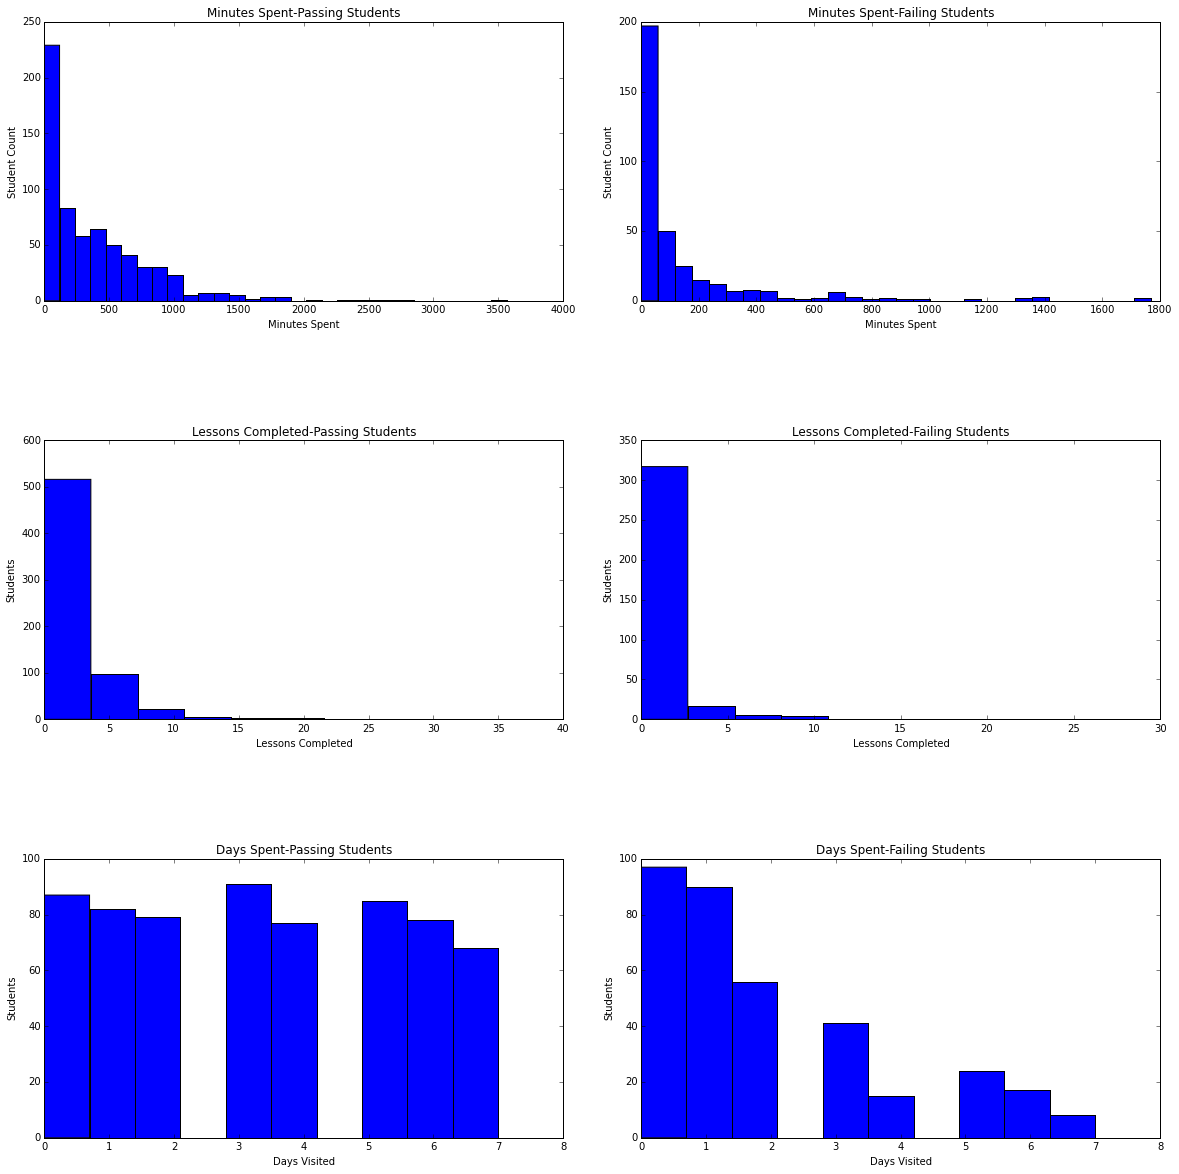

In [206]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline 
# Above is for jupyter to render in the notebook

import matplotlib.pyplot as plt

fig = plt.figure()
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.15)

ax1 = fig.add_subplot(3, 2, 1)
ax1.set
ax1.set_xlabel('Minutes Spent')
ax1.set_ylabel('Student Count')
ax1.set_title('Minutes Spent-Passing Students')

ax2 = fig.add_subplot(3, 2, 2)
ax2.set_xlabel('Minutes Spent')
ax2.set_ylabel('Student Count')
ax2.set_title('Minutes Spent-Failing Students')

ax3 = fig.add_subplot(3, 2, 3)
ax3.set_xlabel('Lessons Completed')
ax3.set_ylabel('Students')
ax3.set_title('Lessons Completed-Passing Students')

ax4 = fig.add_subplot(3, 2, 4)
ax4.set_xlabel('Lessons Completed')
ax4.set_ylabel('Students')
ax4.set_title('Lessons Completed-Failing Students')

ax5 = fig.add_subplot(3, 2, 5)
ax5.set_xlabel('Days Visited')
ax5.set_ylabel('Students')
ax5.set_title('Days Spent-Passing Students')

ax6 = fig.add_subplot(3, 2, 6)
ax6.set_xlabel('Days Visited')
ax6.set_ylabel('Students')
ax6.set_title('Days Spent-Failing Students')

ax1 = ax1.hist(minutes_passing, bins=30)
ax2 = ax2.hist(minutes_non_passing, bins=30)
ax3 = ax3.hist(lesson_count_passing)
ax4 = ax4.hist(lesson_count_non_passing)
ax5 = ax5.hist(days_visited_passing)
ax6 = ax6.hist(days_visited_non_passing)

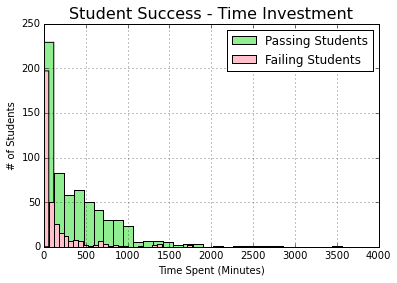

In [228]:
## Comparison for description on git

%matplotlib inline 
# Above is for jupyter to render in the notebook

import matplotlib.pyplot as plt

plt.hist(minutes_passing, bins=30, color=['lightgreen'], label=['Passing Students'])
plt.hist(minutes_non_passing, bins=30, color=['pink'], label=['Failing Students'])
plt.xlabel('Time Spent (Minutes)')
plt.ylabel('# of Students')
plt.title('Student Success - Time Investment', fontsize=16)
plt.grid(True)
plt.legend()

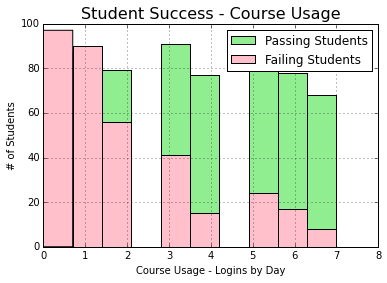

In [229]:
## Comparison for description on git

%matplotlib inline 
# Above is for jupyter to render in the notebook

import matplotlib.pyplot as plt


plt.hist(days_visited_passing, color=['lightgreen'], label=['Passing Students'])
plt.hist(days_visited_non_passing, color=['pink'], label=['Failing Students'])
plt.xlabel('Course Usage - Logins by Day')
plt.ylabel('# of Students')
plt.title('Student Success - Course Usage', fontsize=16)
plt.grid(True)
plt.legend()

## Improving Plots and Sharing Findings

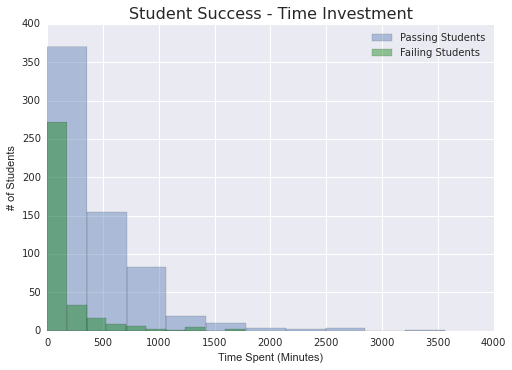

In [282]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns

sns.distplot(minutes_passing, kde=False, bins=10, label="Passing Students");
sns.distplot(minutes_non_passing, kde=False, bins=10, color='green', label="Failing Students");
plt.legend()
plt.xlabel('Time Spent (Minutes)')
plt.ylabel('# of Students')
plt.title('Student Success - Time Investment', fontsize=16)

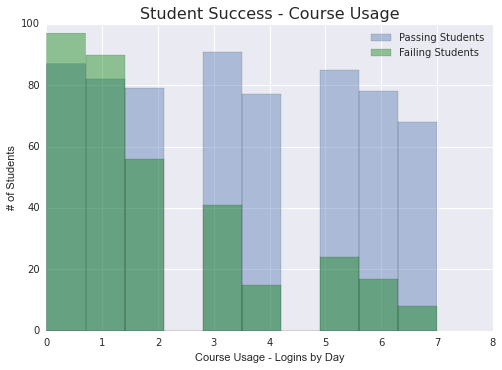

In [283]:
sns.distplot(days_visited_passing, kde=False, bins=10, label="Passing Students");
sns.distplot(days_visited_non_passing, kde=False, bins=10, color='green', label="Failing Students");
plt.legend()
plt.xlabel('Course Usage - Logins by Day')
plt.ylabel('# of Students')
plt.title('Student Success - Course Usage', fontsize=16)

In [285]:
# Setup pandas to read in the full engagement table
import pandas as pd

daily_engagement = pd.read_csv('daily_engagement_full.csv')

len(daily_engagement.get('acct').unique())

1237

In [286]:
import numpy as np

# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

In [329]:
# Change False to True for each block of code to see what it does

# Accessing elements
if True:
    print countries[0]
    print countries[3]

# Slicing
if False:
    print countries[0:3]
    print countries[:3]
    print countries[17:]
    print countries[:]

# Element types
if False:
    print countries.dtype
    print employment.dtype
    print np.array([0, 1, 2, 3]).dtype
    print np.array([1.0, 1.5, 2.0, 2.5]).dtype
    print np.array([True, False, True]).dtype
    print np.array(['AL', 'AK', 'AZ', 'AR', 'CA']).dtype

# Looping
if False:
    for country in countries:
        print 'Examining country {}'.format(country)

    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        print 'Country {} has employment {}'.format(country,
                country_employment)

# Numpy functions
if False:
    print employment.mean()
    print employment.std()
    print employment.max()
    print employment.sum()

Afghanistan
Angola


In [340]:
def max_employment(countries, employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    '''
    max_country = countries[int(tuple(np.where(employment==employment.max())[0])[0])]     # Replace this with your code
    max_value = employment.max()   # Replace this with your code

    return (max_country, max_value)

    # Alternate Instructor solution
#     return (countries[employment.argmax()], employment.max())

max_employment(countries, employment)

('Angola', 75.699996949999999)

In [342]:
import numpy as np

# Change False to True for each block of code to see what it does

# Arithmetic operations between 2 NumPy arrays
if False:
    a = np.array([1, 2, 3, 4])
    b = np.array([1, 2, 1, 2])
    
    print a + b
    print a - b
    print a * b
    print a / b
    print a ** b
    
# Arithmetic operations between a NumPy array and a single number
if True:
    a = np.array([1, 2, 3, 4])
    b = 2
    
    print a + b
    print a - b
    print a * b
    print a / b
    print a ** b
    
# Logical operations with NumPy arrays
if False:
    a = np.array([True, True, False, False])
    b = np.array([True, False, True, False])
    
    print a & b
    print a | b
    print ~a
    
    print a & True
    print a & False
    
    print a | True
    print a | False
    
# Comparison operations between 2 NumPy Arrays
if False:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([5, 4, 3, 2, 1])
    
    print a > b
    print a >= b
    print a < b
    print a <= b
    print a == b
    print a != b
    
# Comparison operations between a NumPy array and a single number
if False:
    a = np.array([1, 2, 3, 4])
    b = 2
    
    print a > b
    print a >= b
    print a < b
    print a <= b
    print a == b
    print a != b

[3 4 5 6]
[-1  0  1  2]
[2 4 6 8]
[0 1 1 2]
[ 1  4  9 16]


In [362]:
# First 20 countries with school completion data
countries = np.array([
       'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Austria','Azerbaijan',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde'
])

# Female school completion rate in 2007 for those 20 countries
female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

# Male school completion rate in 2007 for those 20 countries
male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

def overall_completion_rate(female_completion, male_completion):
    '''
    Fill in this function to return a NumPy array containing the overall
    school completion rate for each country. The arguments are NumPy
    arrays giving the female and male completion of each country in
    the same order.
    '''
    
    return  (female_completion + male_completion)/2

overall_completion_rate(female_completion, male_completion)

array([  96.416025,  102.644275,  101.41129 ,   93.316285,  103.455575,
         98.148215,  102.35113 ,   91.77855 ,   92.835475,   89.655755,
         99.218715,   98.484275,   94.172835,  117.335125,   98.275645,
         33.04039 ,   41.905225,   90.962965,   57.08404 ,   93.06015 ])

In [365]:
import numpy as np

# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

# Change this country name to change what country will be printed when you
# click "Test Run". Your function will be called to determine the standardized
# score for this country for each of the given 5 Gapminder variables in 2007.
# The possible country names are available in the Downloadables section.

country_name = 'United States'

def standardize_data(values):
    '''
    Fill in this function to return a standardized version of the given values,
    which will be in a NumPy array. Each value should be translated into the
    number of standard deviations that value is away from the mean of the data.
    (A positive number indicates a value higher than the mean, and a negative
    number indicates a value lower than the mean.)
    
    The formula is effectively the the distance between the vector and the mean divided 
    by the deviation.
    '''

    return (values-np.mean(values))/np.std(values)

standardize_data(employment)

array([-0.31965231, -0.780123  , -0.87650077,  1.82207181, -0.03051941,
       -1.99019768,  0.30144772, -0.16973184,  0.23719615,  0.84758731,
        0.18365304,  1.00821665,  0.87971351, -0.56595055, -1.07996476,
       -0.20185762,  1.38301845, -0.03051941,  1.2545153 , -1.87240259])

In [367]:
import numpy as np

# Change False to True for each block of code to see what it does

# Using index arrays
if False:
    a = np.array([1, 2, 3, 4])
    b = np.array([True, True, False, False])
    
    print a[b]
    print a[np.array([True, False, True, False])]
    
# Creating the index array using vectorized operations
if False:
    a = np.array([1, 2, 3, 2, 1])
    b = (a >= 2)
    
    print a[b]
    print a[a >= 2]
    
# Creating the index array using vectorized operations on another array
if False:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([1, 2, 3, 2, 1])
    
    print b == 2
    print a[b == 2]

def mean_time_for_paid_students(time_spent, days_to_cancel):
    '''
    Fill in this function to calculate the mean time spent in the classroom
    for students who stayed enrolled at least (greater than or equal to) 7 days.
    Unlike in Lesson 1, you can assume that days_to_cancel will contain only
    integers (there are no students who have not canceled yet).
    
    The arguments are NumPy arrays. time_spent contains the amount of time spent
    in the classroom for each student, and days_to_cancel contains the number
    of days until each student cancel. The data is given in the same order
    in both arrays.
    '''
    return np.mean(time_spent[days_to_cancel>=7])

# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])

mean_time_for_paid_students(time_spent, days_to_cancel)

41.054003485454537

In [468]:
import pandas as pd

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

# Change False to True for each block of code to see what it does

# Accessing elements and slicing
if False:
    print life_expectancy[0]
    print gdp[3:6]
    
# Looping
if False:
    for country_life_expectancy in life_expectancy:
        print 'Examining life expectancy {}'.format(country_life_expectancy)
        
# Pandas functions
if False:
    print life_expectancy.mean()
    print life_expectancy.std()
    print gdp.max()
    print gdp.sum()

# Vectorized operations and index arrays
if False:
    a = pd.Series([1, 2, 3, 4])
    b = pd.Series([1, 2, 1, 2])
  
    print a + b
    print a * 2
    print a >= 3
    print a[a >= 3]
   
def variable_correlation(variable1, variable2):
    
    both_up = (variable1 > variable1.mean()) & (variable2 > variable2.mean())
    up = len(both_up[both_up==True])
    both_down = (variable1 < variable1.mean()) & (variable2 < variable2.mean())
    down = len(both_down[both_down==True])
    
    num_same_direction = up + down
    num_different_direction = len(variable1) -  num_same_direction
    
    return (num_same_direction, num_different_direction)

variable_correlation(life_expectancy, gdp)

17
20


(17, 3)

In [472]:
import pandas as pd

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas argmax() function. Documention is
    here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.argmax.html
    '''
    max_country = employment.argmax()      # Replace this with your code
    max_value = employment.max()   # Replace this with your code

    return (max_country, max_value)

max_employment(employment)

('Angola', 75.69999695)

In [479]:
import pandas as pd

# Change False to True for each block of code to see what it does

# Addition when indexes are the same
if False:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
    print s1 + s2

# Indexes have same elements in a different order
if False:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
    print s1 + s2

# Indexes overlap, but do not have exactly the same elements
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
    print s1 + s2

# Indexes do not overlap
if False:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
    print s1 + s2

a   NaN
b   NaN
c    13
d    24
e   NaN
f   NaN
dtype: float64


In [519]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])


print s2.add(s1, fill_value=0)


a     1
b     2
c    13
d    24
e    30
f    40
dtype: float64


In [555]:
import pandas as pd

# Change False to True to see what the following block of code does

# Example pandas apply() usage (although this could have been done
# without apply() using vectorized operations)
if False:
    s = pd.Series([1, 2, 3, 4, 5])
    def add_one(x):
        return x + 1
    print s.apply(add_one)

names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    temp = names.split(' ')
    return temp[1] +', '+ temp[0]

names.apply(reverse_names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

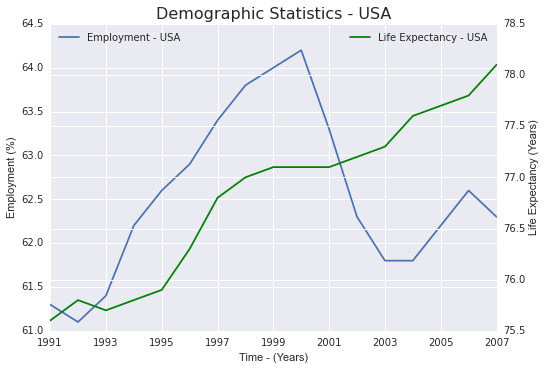

In [734]:
import pandas as pd
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = '/Users/Vinay/Documents/Code/Udacity/numpy_pandas_learning/'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".
year_list = employment_us.index.values
life = life_expectancy_us.get(year_list)
gdp = gdp_us.get(year_list)
m_ed = male_completion_us.get(year_list)
f_ed = female_completion_us.get(year_list)
ed = (f_ed.add(m_ed, fill_value=0).fillna(0))/2

# Here, we're only plotting Employment vs Life Expectancy as the completion stat seems 
# > 100% and the gdp chart didn't add much to the story (other than being correlated
# to Life Expectancy)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

employment_us.plot(ax=ax, label='Employment - USA')
life.plot(ax=ax2, color='green', label='Life Expectancy - USA')
ax.set_xlabel('Time - (Years)')
ax.set_ylabel('Employment (%)')
ax2.set_ylabel('Life Expectancy (Years)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Demographic Statistics - USA', fontsize=16)

plt.show()

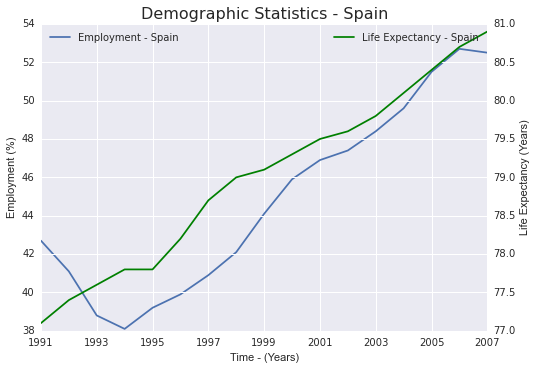

In [735]:
import pandas as pd
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = '/Users/Vinay/Documents/Code/Udacity/numpy_pandas_learning/'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['Spain']
female_completion_us = female_completion.loc['Spain']
male_completion_us = male_completion.loc['Spain']
life_expectancy_us = life_expectancy.loc['Spain']
gdp_us = gdp.loc['Spain']

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".
year_list = employment_us.index.values
life = life_expectancy_us.get(year_list)
gdp = gdp_us.get(year_list)
m_ed = male_completion_us.get(year_list)
f_ed = female_completion_us.get(year_list)
ed = (f_ed.add(m_ed, fill_value=0).fillna(0))/2

# Here, we're only plotting Employment vs Life Expectancy as the completion stat seems 
# > 100% and the gdp chart didn't add much to the story (other than being correlated
# to Life Expectancy)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

employment_us.plot(ax=ax, label='Employment - Spain')
life.plot(ax=ax2, color='green', label='Life Expectancy - Spain')
ax.set_xlabel('Time - (Years)')
ax.set_ylabel('Employment (%)')
ax2.set_ylabel('Life Expectancy (Years)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Demographic Statistics - Spain', fontsize=16)

plt.show()

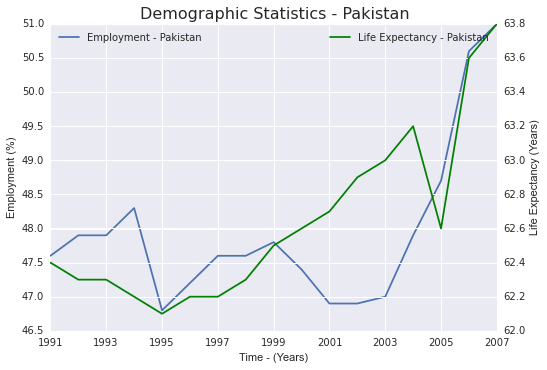

In [736]:
import pandas as pd
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = '/Users/Vinay/Documents/Code/Udacity/numpy_pandas_learning/'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['Pakistan']
female_completion_us = female_completion.loc['Pakistan']
male_completion_us = male_completion.loc['Pakistan']
life_expectancy_us = life_expectancy.loc['Pakistan']
gdp_us = gdp.loc['Pakistan']

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".
year_list = employment_us.index.values
life = life_expectancy_us.get(year_list)
gdp = gdp_us.get(year_list)
m_ed = male_completion_us.get(year_list)
f_ed = female_completion_us.get(year_list)
ed = (f_ed.add(m_ed, fill_value=0).fillna(0))/2

# Here, we're only plotting Employment vs Life Expectancy as the completion stat seems 
# > 100% and the gdp chart didn't add much to the story (other than being correlated
# to Life Expectancy)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

employment_us.plot(ax=ax, label='Employment - Pakistan')
life.plot(ax=ax2, color='green', label='Life Expectancy - Pakistan')
ax.set_xlabel('Time - (Years)')
ax.set_ylabel('Employment (%)')
ax2.set_ylabel('Life Expectancy (Years)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Demographic Statistics - Pakistan', fontsize=16)

plt.show()

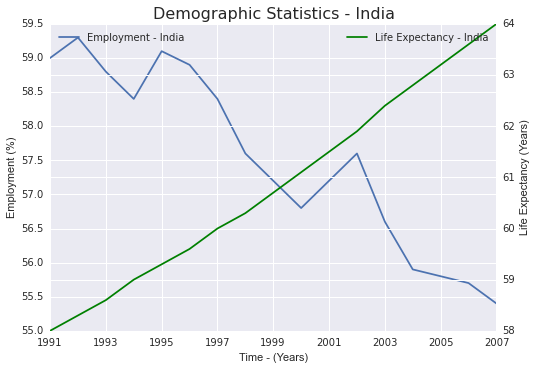

In [737]:
import pandas as pd
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = '/Users/Vinay/Documents/Code/Udacity/numpy_pandas_learning/'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['India']
female_completion_us = female_completion.loc['India']
male_completion_us = male_completion.loc['India']
life_expectancy_us = life_expectancy.loc['India']
gdp_us = gdp.loc['India']

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".
year_list = employment_us.index.values
life = life_expectancy_us.get(year_list)
gdp = gdp_us.get(year_list)
m_ed = male_completion_us.get(year_list)
f_ed = female_completion_us.get(year_list)
ed = (f_ed.add(m_ed, fill_value=0).fillna(0))/2

# Here, we're only plotting Employment vs Life Expectancy as the completion stat seems 
# > 100% and the gdp chart didn't add much to the story (other than being correlated
# to Life Expectancy)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

employment_us.plot(ax=ax, label='Employment - India')
life.plot(ax=ax2, color='green', label='Life Expectancy - India')
ax.set_xlabel('Time - (Years)')
ax.set_ylabel('Employment (%)')
ax2.set_ylabel('Life Expectancy (Years)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Demographic Statistics - India', fontsize=16)

plt.show()